In [1]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt

### Adiquirindo dados

Os dados foram adquiridos a partir de um arquivo CSV chamado dataset.csv. Utilizamos a biblioteca pandas para ler o arquivo e carregar os dados em um DataFrame. A seguir, apresentamos as primeiras linhas do DataFrame para visualização inicial dos dados:

In [2]:
data = pd.read_csv("dataset.csv")
data.head()

,valor_aluguel,area_m2,ano_construcao,codigo_localidade,numero_banheiros,numero_cozinhas,codigo_bairro
0,120.97436,35,1939,1,0,0,1112
1,436.97433,104,1939,1,1,0,1112
2,355.74360,29,1971,2,0,0,2114
3,282.92310,39,1972,2,0,0,2148
4,807.23080,97,1985,1,0,0,2222


### Possivis correlações

Neste notebook, vamos analisar o conjunto de dados dos valores de aluguel. Vamos tentar encontrar correlações entre as variáveis e o valor do aluguel.

In [3]:
data.corr()

,valor_aluguel,area_m2,ano_construcao,codigo_localidade,numero_banheiros,numero_cozinhas,codigo_bairro
valor_aluguel,1.000000,0.584878,0.139194,0.172368,0.250261,0.170707,-0.020846
area_m2,0.584878,1.000000,-0.226581,0.110046,0.226306,0.045716,-0.089050
ano_construcao,0.139194,-0.226581,1.000000,-0.152206,0.065824,0.109881,0.327983
codigo_localidade,0.172368,0.110046,-0.152206,1.000000,0.037858,-0.004774,-0.282528
numero_banheiros,0.250261,0.226306,0.065824,0.037858,1.000000,0.064216,0.043600
numero_cozinhas,0.170707,0.045716,0.109881,-0.004774,0.064216,1.000000,0.029495
codigo_bairro,-0.020846,-0.089050,0.327983,-0.282528,0.043600,0.029495,1.000000


### Treinamento

Vamos treinar um modelo de regressão linear para prever o valor do aluguel com base nas variáveis disponíveis.

In [4]:
X, Y = data["area_m2"], data["valor_aluguel"]
X = sm.add_constant(X)
modelo = sm.OLS(Y, X)

In [5]:
resultado = modelo.fit()

### Resultado

resultados de previsão de aluguel com base nas variáveis disponíveis. foi obtido um P>|t| de 0.0, o que indica que a variável é significativa para o modelo. porem foi obtido um R-squared de 0.342, o que indica que o modelo não é muito bom para prever o valor do aluguel com base nas variáveis disponíveis.

In [6]:
resultado.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          valor_aluguel   R-squared:                       0.342
Model:                            OLS   Adj. R-squared:                  0.342
Method:                 Least Squares   F-statistic:                     1559.
Date:                Sat, 12 Oct 2024   Prob (F-statistic):          6.84e-275
Time:                        22:26:33   Log-Likelihood:                -19461.
No. Observations:                3000   AIC:                         3.893e+04
Df Residuals:                    2998   BIC:                         3.894e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        133.6988      8.750     15.279      0.000     116.541     150.856
area_m2        4.8386      0.123     39.482      0.000       4.598       5.079
==============================================================================
Omnibus:                      206.173   Durbin-Watson:                   2.003
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              441.379
Skew:                           0.448   Prob(JB):                     1.43e-96
Kurtosis:                       4.651   Cond. No.                         215.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Exemplo de previsão de aluguel com base nas variáveis disponíveis:

C:\Users\kauas\AppData\Local\Temp\ipykernel_18792\3747994607.py:7: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  figure.show()


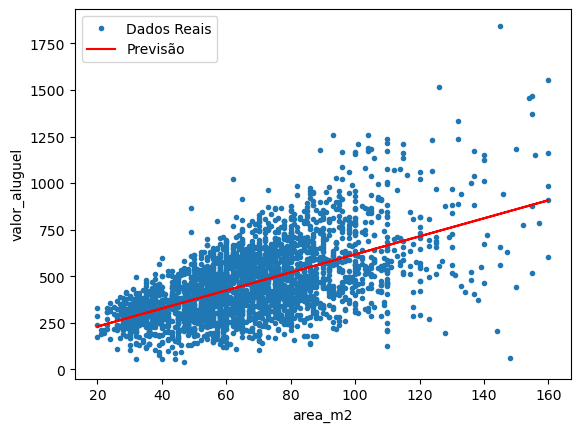

In [7]:
figure = plt.figure()
plt.xlabel("area_m2")
plt.ylabel("valor_aluguel")
plt.plot(X["area_m2"], Y, ".", label="Dados Reais")
plt.plot(X["area_m2"], resultado.fittedvalues, "r-", label="Previsão")
plt.legend()
figure.show()